#### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Load dataset

In [2]:
marketing_data = pd.read_csv("data/marketing_campaign.csv")

#### Subset for relevant columns

In [3]:
marketing_data = marketing_data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                                 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 
                                 'NumWebVisitsMonth']]

#### Inspect first 5 rows and data types of the dataset

In [4]:
marketing_data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [5]:
marketing_data.shape

(2240, 11)

In [6]:
marketing_data.dtypes

MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

#### Scale the data

In [7]:
scaler = StandardScaler()
marketing_data_scaled = scaler.fit_transform(marketing_data)

#### Build Kmeans model

In [8]:
kmeans = KMeans(n_clusters= 4, init='k-means++',random_state = 1)

kmeans.fit(marketing_data_scaled)

KMeans(n_clusters=4, random_state=1)

In [9]:
label = kmeans.fit_predict(marketing_data_scaled)

In [10]:
marketing_data_output = marketing_data.copy()
marketing_data_output['cluster'] = label
marketing_data_output['cluster'].value_counts()

0    1020
2     475
3     467
1     278
Name: cluster, dtype: int64

Text(0, 0.5, 'Inertia')

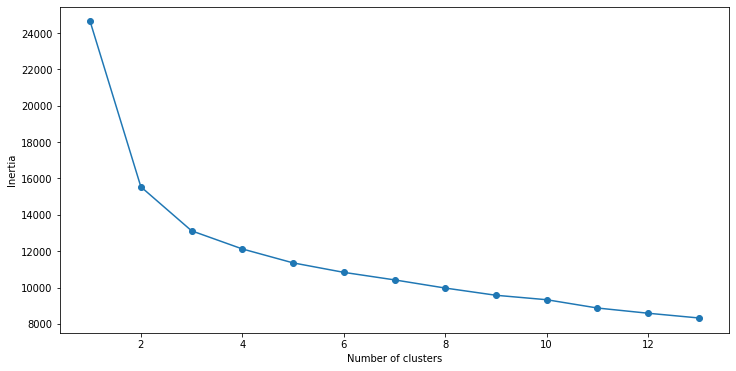

In [11]:
distance_values = []
for cluster in range(1,14):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(marketing_data_scaled)
    distance_values.append(kmeans.inertia_)

cluster_output = pd.DataFrame({'Cluster':range(1,14), 'distance_values':distance_values})
plt.figure(figsize=(12,6))
plt.plot(cluster_output['Cluster'], cluster_output['distance_values'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')